In [1]:
# importar as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import matplotlib.dates as mdates #para manipulação de data no matplotlib

%matplotlib inline
%config InlineBackend.figure_format = 'svg' 

#Importar as bibliotecas do plotly para criação de gráficos geoespaciais com 
#Choropleth
import plotly
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

init_notebook_mode(connected = True)

In [2]:
df_lt_GO = pd.read_csv('LT_GO_PAND_COV19.csv')

In [3]:
#Imprimindo a quantidade de variáveis e entradas do dataset
print("Quantidade de dados: ", df_lt_GO.shape[0])
print("Quantidade de variáveis: ", df_lt_GO.shape[1])

Quantidade de dados:  115111
Quantidade de variáveis:  28


In [4]:
#Imprimindo as 5 primeiras linhas
df_lt_GO.head()

,CNES,CODUFMUN,REGSAUDE,MICR_REG,DISTRSAN,DISTRADM,TPGESTAO,PF_PJ,CPF_CNPJ,NIV_DEP,...,NIV_HIER,TERCEIRO,TP_LEITO,CODLEITO,QT_EXIST,QT_CONTR,QT_SUS,QT_NSUS,COMPETEN,NAT_JUR
0,9331603,520010,NaN,NaN,NaN,NaN,M,3,0,3,...,NaN,NaN,2,33,9,0,9,0,201912,1244
1,2335506,520013,15,NaN,NaN,NaN,M,3,269860000125,1,...,NaN,NaN,2,41,2,0,2,0,201912,2062
2,2335506,520013,15,NaN,NaN,NaN,M,3,269860000125,1,...,NaN,NaN,1,3,2,0,1,1,201912,2062
3,2335506,520013,15,NaN,NaN,NaN,M,3,269860000125,1,...,NaN,NaN,4,10,1,0,1,0,201912,2062
4,2335506,520013,15,NaN,NaN,NaN,M,3,269860000125,1,...,NaN,NaN,6,34,4,0,3,1,201912,2062


In [5]:
#Imprimindo as 5 últimas linhas
df_lt_GO.tail()

,CNES,CODUFMUN,REGSAUDE,MICR_REG,DISTRSAN,DISTRADM,TPGESTAO,PF_PJ,CPF_CNPJ,NIV_DEP,...,NIV_HIER,TERCEIRO,TP_LEITO,CODLEITO,QT_EXIST,QT_CONTR,QT_SUS,QT_NSUS,COMPETEN,NAT_JUR
115106,2383691,522205,001,NaN,NaN,NaN,M,3,0,3,...,NaN,NaN,1,3,3,0,3,0,202211,1244
115107,2383691,522205,001,NaN,NaN,NaN,M,3,0,3,...,NaN,NaN,4,10,3,0,3,0,202211,1244
115108,2439883,522220,02,NaN,NaN,NaN,M,3,0,3,...,NaN,NaN,2,33,7,0,7,0,202211,1244
115109,2439883,522220,02,NaN,NaN,NaN,M,3,0,3,...,NaN,NaN,4,43,2,0,2,0,202211,1244
115110,2439883,522220,02,NaN,NaN,NaN,M,3,0,3,...,NaN,NaN,5,45,4,0,4,0,202211,1244


In [6]:
#Imprimindo de forma descrecente o percentual de valores ausentes
df_lt_GO.isnull().sum().sort_values(ascending = False)/df_lt_GO.shape[0]

NATUREZA    1.000000
NIV_HIER    1.000000
RETENCAO    1.000000
ESFERA_A    1.000000
TERCEIRO    1.000000
DISTRSAN    1.000000
DISTRADM    0.989289
MICR_REG    0.947399
REGSAUDE    0.390362
CLIENTEL    0.005308
COMPETEN    0.000000
QT_NSUS     0.000000
QT_CONTR    0.000000
QT_EXIST    0.000000
CODLEITO    0.000000
TP_LEITO    0.000000
QT_SUS      0.000000
CNES        0.000000
TURNO_AT    0.000000
TP_UNID     0.000000
CODUFMUN    0.000000
ATIVIDAD    0.000000
CNPJ_MAN    0.000000
NIV_DEP     0.000000
CPF_CNPJ    0.000000
PF_PJ       0.000000
TPGESTAO    0.000000
NAT_JUR     0.000000
dtype: float64

In [7]:
# Excluindo variaveis com alto percentual de valores ausentes
df_lt_GO.drop(["NATUREZA", "NIV_HIER", "RETENCAO", "ESFERA_A", "TERCEIRO",
               "DISTRSAN", "DISTRADM", "MICR_REG"], axis=1, inplace=True)

In [8]:
#Imprimindo a quantidade de variáveis e entradas do dataset
print("Quantidade de dados: ", df_lt_GO.shape[0])
print("Quantidade de variáveis: ", df_lt_GO.shape[1])

Quantidade de dados:  115111
Quantidade de variáveis:  20


In [9]:
#Imprimindo as 5 primeiras linhas
df_lt_GO.head()

,CNES,CODUFMUN,REGSAUDE,TPGESTAO,PF_PJ,CPF_CNPJ,NIV_DEP,CNPJ_MAN,ATIVIDAD,CLIENTEL,TP_UNID,TURNO_AT,TP_LEITO,CODLEITO,QT_EXIST,QT_CONTR,QT_SUS,QT_NSUS,COMPETEN,NAT_JUR
0,9331603,520010,NaN,M,3,0,3,1298330000178,4,3.0,15,6,2,33,9,0,9,0,201912,1244
1,2335506,520013,15,M,3,269860000125,1,0,4,3.0,5,6,2,41,2,0,2,0,201912,2062
2,2335506,520013,15,M,3,269860000125,1,0,4,3.0,5,6,1,3,2,0,1,1,201912,2062
3,2335506,520013,15,M,3,269860000125,1,0,4,3.0,5,6,4,10,1,0,1,0,201912,2062
4,2335506,520013,15,M,3,269860000125,1,0,4,3.0,5,6,6,34,4,0,3,1,201912,2062


In [10]:
# Excluindo variaveis que nao influenciarao na analise dos leitos
df_lt_GO.drop(["CNES", "TPGESTAO", "PF_PJ", "CPF_CNPJ", "NIV_DEP", 
               "CNPJ_MAN","NAT_JUR"], axis=1, inplace=True)

In [11]:
#Imprimindo os tipos de cada variável
df_lt_GO.dtypes

CODUFMUN      int64
REGSAUDE     object
ATIVIDAD      int64
CLIENTEL    float64
TP_UNID       int64
TURNO_AT      int64
TP_LEITO      int64
CODLEITO      int64
QT_EXIST      int64
QT_CONTR      int64
QT_SUS        int64
QT_NSUS       int64
COMPETEN      int64
dtype: object

In [12]:
# Imprimindo a quantidade de variáveis e entradas do dataset
print("Quantidade de dados: ", df_lt_GO.shape[0])
print("Quantidade de variáveis: ", df_lt_GO.shape[1])

Quantidade de dados:  115111
Quantidade de variáveis:  13


In [13]:
df_lt_GO["COMPETEN"] = pd.to_datetime(df_lt_GO["COMPETEN"], format='%Y%m')

In [14]:
#Imprimindo as 5 primeiras linhas
df_lt_GO.head()

,CODUFMUN,REGSAUDE,ATIVIDAD,CLIENTEL,TP_UNID,TURNO_AT,TP_LEITO,CODLEITO,QT_EXIST,QT_CONTR,QT_SUS,QT_NSUS,COMPETEN
0,520010,NaN,4,3.0,15,6,2,33,9,0,9,0,2019-12-01
1,520013,15,4,3.0,5,6,2,41,2,0,2,0,2019-12-01
2,520013,15,4,3.0,5,6,1,3,2,0,1,1,2019-12-01
3,520013,15,4,3.0,5,6,4,10,1,0,1,0,2019-12-01
4,520013,15,4,3.0,5,6,6,34,4,0,3,1,2019-12-01


In [15]:
df_lt_GO["mes_comp"] = (df_lt_GO["COMPETEN"].dt.month)

In [16]:
df_lt_GO["ano_comp"] = (df_lt_GO["COMPETEN"].dt.year)

In [17]:
df_lt_GO.drop(["COMPETEN"], axis=1, inplace=True)

In [18]:
#Imprimindo as 5 primeiras linhas
df_lt_GO.head()

,CODUFMUN,REGSAUDE,ATIVIDAD,CLIENTEL,TP_UNID,TURNO_AT,TP_LEITO,CODLEITO,QT_EXIST,QT_CONTR,QT_SUS,QT_NSUS,mes_comp,ano_comp
0,520010,NaN,4,3.0,15,6,2,33,9,0,9,0,12,2019
1,520013,15,4,3.0,5,6,2,41,2,0,2,0,12,2019
2,520013,15,4,3.0,5,6,1,3,2,0,1,1,12,2019
3,520013,15,4,3.0,5,6,4,10,1,0,1,0,12,2019
4,520013,15,4,3.0,5,6,6,34,4,0,3,1,12,2019


In [19]:
#Imprimindo os tipos de cada variável
df_lt_GO.dtypes

CODUFMUN      int64
REGSAUDE     object
ATIVIDAD      int64
CLIENTEL    float64
TP_UNID       int64
TURNO_AT      int64
TP_LEITO      int64
CODLEITO      int64
QT_EXIST      int64
QT_CONTR      int64
QT_SUS        int64
QT_NSUS       int64
mes_comp      int64
ano_comp      int64
dtype: object

In [20]:
#Imprimindo de forma descrecente o percentual de valores ausentes
df_lt_GO.isnull().sum().sort_values(ascending = False)/df_lt_GO.shape[0]

REGSAUDE    0.390362
CLIENTEL    0.005308
CODUFMUN    0.000000
ATIVIDAD    0.000000
TP_UNID     0.000000
TURNO_AT    0.000000
TP_LEITO    0.000000
CODLEITO    0.000000
QT_EXIST    0.000000
QT_CONTR    0.000000
QT_SUS      0.000000
QT_NSUS     0.000000
mes_comp    0.000000
ano_comp    0.000000
dtype: float64

## Numero de Leitos existentes do Inicio da Pandemia ate o momento em Goias ###

In [41]:
df2 = df_lt_GO.groupby(['ano_comp'])['QT_EXIST'].count()

In [42]:
df2

ano_comp
2019     2810
2020    37488
2021    38688
2022    36125
Name: QT_EXIST, dtype: int64

<AxesSubplot:xlabel='ano_comp'>

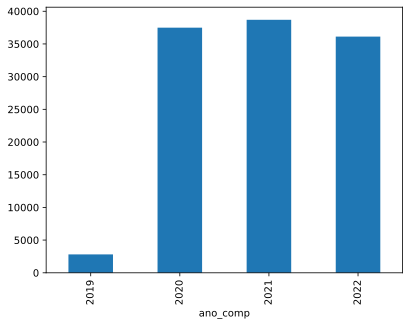

In [44]:
df2.plot(kind='bar')

## Quantidade de Leitos SUS x Quantidades de Leitos Nao SUS ##

In [52]:
df3 = df_lt_GO.groupby(['ano_comp'])['QT_SUS'].count()
df3

ano_comp
2019     2810
2020    37488
2021    38688
2022    36125
Name: QT_SUS, dtype: int64

In [55]:
df4 = df_lt_GO.groupby(['ano_comp'])['QT_NSUS'].count()
df4

ano_comp
2019     2810
2020    37488
2021    38688
2022    36125
Name: QT_NSUS, dtype: int64

In [56]:
df5 = df_lt_GO.groupby(['ano_comp'])['TP_LEITO'].count()
df5

ano_comp
2019     2810
2020    37488
2021    38688
2022    36125
Name: TP_LEITO, dtype: int64

## Distribuicao dos Leitos por Municipio ##

In [57]:
df6 = df_lt_GO.groupby(['CODUFMUN'])['QT_EXIST'].count()
df6

CODUFMUN
520010     39
520013    546
520017     58
520025    354
520030    234
         ... 
522170    391
522185    725
522200    312
522205    234
522220    117
Name: QT_EXIST, Length: 194, dtype: int64

### cezaraugustomeiracarmo@gmail.com - (77) 99821-9952 ###